### Notes
- Ask if we need a qualitative variable for DecisionTree and Logistic Regression
- How to choose max depth in feature selection
- Confusion matrix and decision regions for the other 2 models?
- really weird cv score graph for decision tree

# Group contribution statement

### Importing Modules and dataset

In [1]:
# importing modules
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np

In [2]:
# loading the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [3]:
penguins = penguins[penguins['Sex'] != '.'] # dropping penguins whose sex is encoded as '.'

# shorten the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)

In [4]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


# Exploratory analysis

### Summary tables

In [5]:
penguins.groupby(["Species", "Island"])["Culmen Length (mm)", "Culmen Depth (mm)"].aggregate([np.mean, np.std]).round(2)

<ipython-input-5-5a489c03b275>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  penguins.groupby(["Species", "Island"])["Culmen Length (mm)", "Culmen Depth (mm)"].aggregate([np.mean, np.std]).round(2)


Culmen Length (mm)       Culmen Depth (mm)      
                                  mean   std              mean   std
Species   Island                                                    
Adelie    Biscoe                 38.98  2.48             18.37  1.19
          Dream                  38.50  2.47             18.25  1.13
          Torgersen              38.95  3.03             18.43  1.34
Chinstrap Dream                  48.83  3.34             18.42  1.14
Gentoo    Biscoe                 47.53  3.08             14.98  0.98

### Visualizations

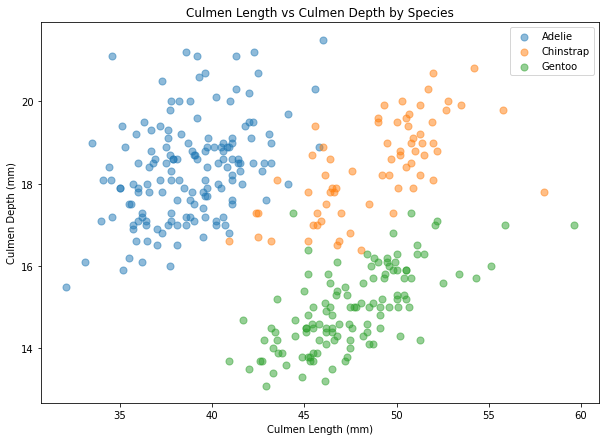

In [6]:
fig, ax = plt.subplots(1, figsize = (10, 7))
ax.set(title = "Culmen Length vs Culmen Depth by Species",
       xlabel = "Culmen Length (mm)",
       ylabel = "Culmen Depth (mm)")

species = np.unique(penguins["Species"])
for x in species:
    newpenguins = penguins[penguins["Species"] == x]
    ax.scatter(newpenguins["Culmen Length (mm)"], newpenguins["Culmen Depth (mm)"], s = 50, label = x.split()[0], alpha = 0.5)
    
ax.legend()

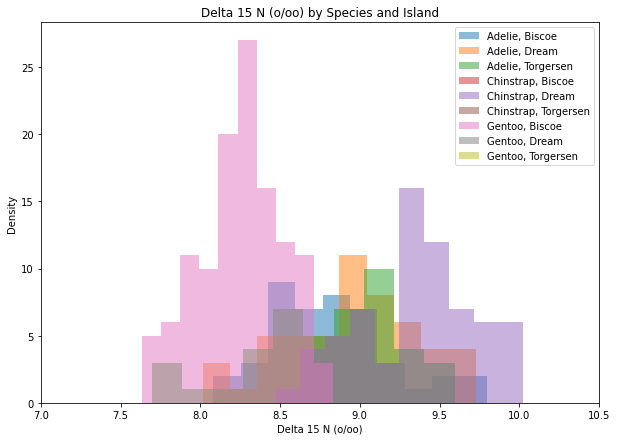

In [7]:
fig, ax = plt.subplots(1, figsize = (10, 7))
ax.set(title = "Delta 15 N (o/oo) by Species and Island",
       xlabel = "Delta 15 N (o/oo)",
       ylabel = "Density")
species = np.unique(penguins["Species"])
location = np.unique(penguins["Island"])
for x in species:
    for y in location:
        newpenguins = penguins[(penguins["Species"] == x) 
                             & (penguins["Delta 15 N (o/oo)"].notnull()) 
                             & (penguins["Island"] == y)]
        ax.hist(newpenguins["Delta 15 N (o/oo)"], label = x + ", " + y, alpha = 0.5)
plt.xlim([7, 10.5])
ax.legend()

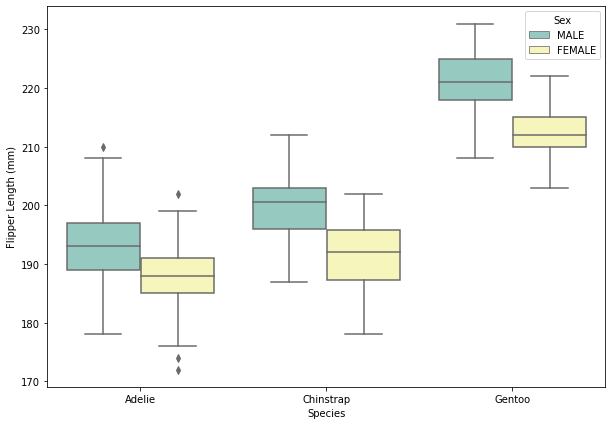

In [8]:
import seaborn as sns
fig, ax = plt.subplots(1, figsize = (10, 7))
ax = sns.boxplot(x="Species", y="Flipper Length (mm)", hue = "Sex", data=penguins, palette = "Set3")

# Modeling

In [36]:
from sklearn.model_selection import train_test_split

np.random.seed(1000) # setting seed so we get the same values when we run the code again

train, test = train_test_split(penguins, test_size = 0.2) # 20% of the dataset will be held as a test set

In [37]:
def clean_data(df_data):
    """
    A function to clean the DataFrame and split the train and test splits further into predictor and target variables
    
    Parameters
    ----------
    df_data: The df to be cleaned
    
    Returns
    -------
    X: the cleaned predictor variables
    y: the cleaned target variable
    """
    df = df_data.copy()
    df = df.drop(['studyName', 'Sample Number', 'Stage', 'Individual ID', 'Comments', 'Date Egg', 'Clutch Completion'], axis = 1)
    df = df.dropna() # dropping NaN rows for columns of interest
    le = preprocessing.LabelEncoder()
    for col in ['Sex', 'Species', 'Island', 'Region']: # using a label encoder to simplify text data
        df[col] = le.fit_transform(df[col])

    X = df.drop(['Species'], axis = 1) # now, X only has predictor variables 
    y = df['Species'] # y is a column of species
    
    return X, y

In [38]:
X_train, y_train = clean_data(train)
X_test, y_test = clean_data(test)

In [39]:
# checking to make sure our cleaning worked properly
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(255, 9) (255,)
(69, 9) (69,)


In [40]:
feature_array = np.array(X_train.columns) # making an array of the column names in X_train

In [41]:
import itertools
combos = itertools.combinations(feature_array, 3) # creating an array of combinations of length 3

In [42]:
qualitative_columns = ['Sex', 'Island', 'Region'] # list of the qualitative columns -- we need one of these to be present
combosof3 = []
for i in combos:
    i = list(i) # converting the combination to a list
    if any(item in i for item in qualitative_columns): # if there is a qualitative value present, we will consider this combination
        combosof3.append(i)

In [43]:
from sklearn import tree
from sklearn.model_selection import cross_val_score 

def check_column_score(model, combosof3):
    """
    Trains and evaluates a model via cross-validation on the different combinations of columns of the data
    
    Parameters
    ----------
    combosof3: A list of potential combinations that can be used to train a model
    
    Returns
    -------
    best_combo: the best combination of columns in terms of accuracy
    best_score: the highest score acheived by a model with the best combination
    """
    # print("training with columns " + str(cols)
    best_score = 0
    best_combo = []
  
    for cols in combosof3:
        cv_score = cross_val_score(model, X_train[cols], y_train, cv = 5).mean()
        if cv_score > best_score:
            best_score = cv_score
            best_combo = cols
    
    return best_combo, best_score

In [45]:
T = tree.DecisionTreeClassifier(max_depth = 5)
best_combo, best_score = check_column_score(T, combosof3)

In [46]:
print(best_combo, best_score) # we found the best combination had an accuracy of 85%

['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 0.9803921568627452


In [48]:
# updating X_train and X_test to only have the 'best' columns
XT_train = X_train[best_combo]
XT_test = X_test[best_combo]

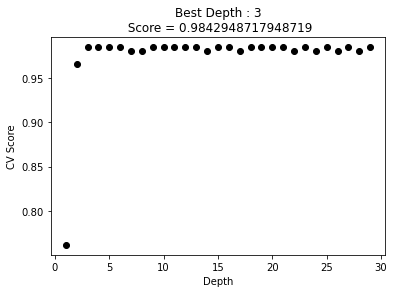

In [49]:
fig, ax = plt.subplots(1)

best_score = 0
best_depth = 0

for d in range(1, 30): # try gamma values from 1 to 30
    T = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = cross_val_score(T, XT_train, y_train, cv = 20).mean()
    ax.scatter(d, cv_score, color = 'black') # plot the gamma value and the cv_score

    if cv_score > best_score:
        best_depth = d
        best_score = cv_score

l = ax.set(title = "Best Depth : " + str(best_depth) + "\n Score = " + str(best_score),
           xlabel = "Depth",
           ylabel = "CV Score",
           alpha = 0.5)

In [50]:
# your code here
T = tree.DecisionTreeClassifier(max_depth = best_depth)
T.fit(XT_train, y_train)
print(best_score)
print(T.score(XT_test, y_test))

0.9842948717948719
0.9855072463768116


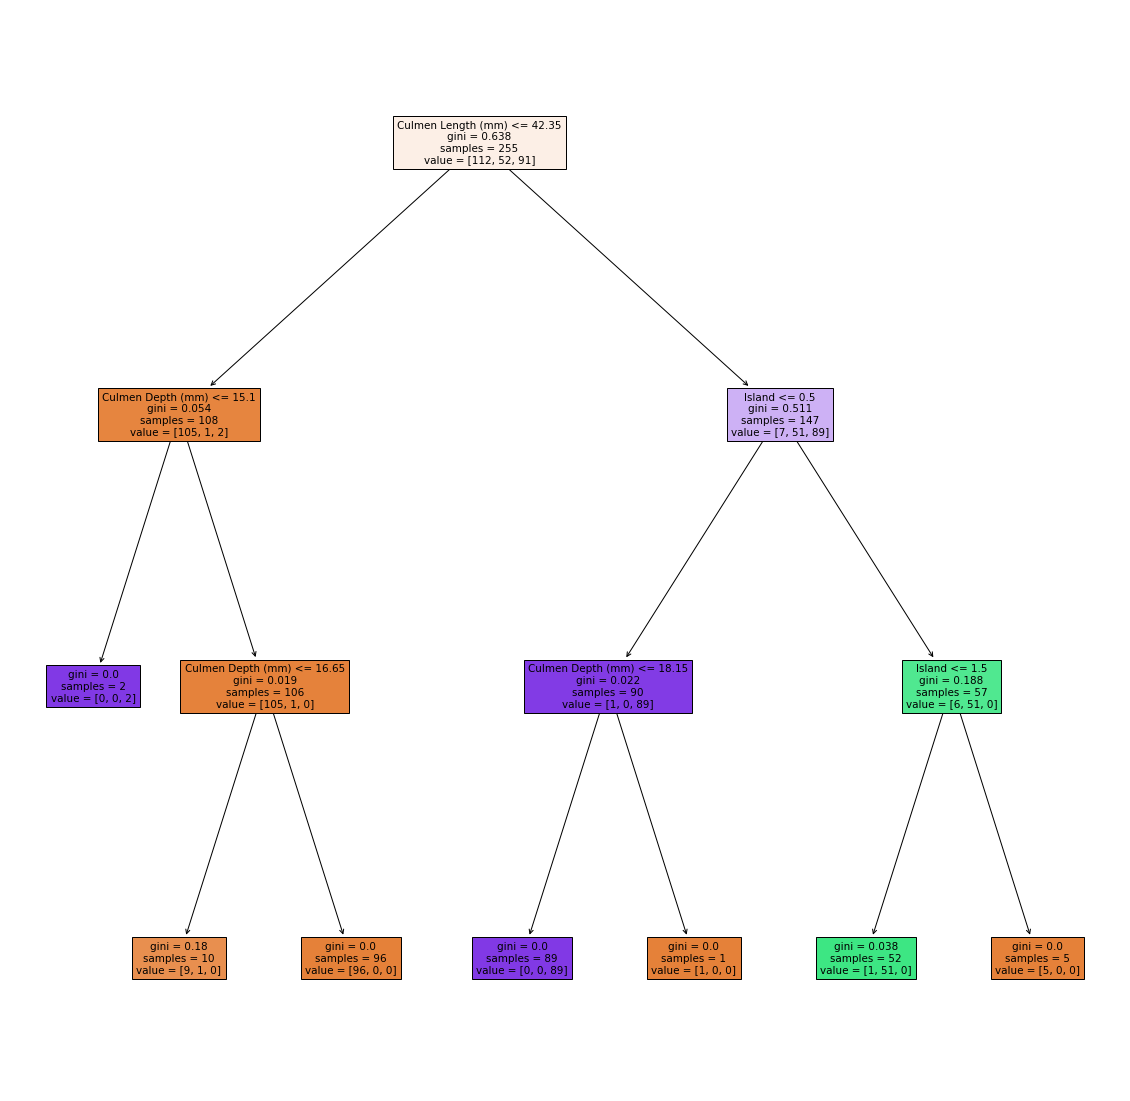

In [51]:
fig, ax = plt.subplots(1, figsize = (20, 20))
p = tree.plot_tree(T, filled = True, feature_names = best_combo)

In [30]:
# get the model's predictions based on the test data
y_test_pred = T.predict(X_test)
y_test_pred

array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2,
       2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2,
       2, 1, 2])

In [31]:
# create a confusion matrix of the actual test target variables and our model's predictions
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_test_pred)
c

array([[26,  1,  0],
       [ 0, 15,  0],
       [ 0,  0, 27]])

In [64]:
mistakes = XT_test[y_test != y_test_pred] # getting the rows of X_test for which our model messed up
mistake_labels = y_test[y_test != y_test_pred] # getting the actual species for where the model messed up 
mistake_preds = y_test_pred[y_test != y_test_pred] # getting the (incorrect) predicted species

mistake_preds, mistake_labels

(array([1]),
 73    0
 Name: Species, dtype: int64)

In [33]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']].loc[43]

Species               Adelie
Island                 Dream
Culmen Length (mm)      44.1
Culmen Depth (mm)       19.7
Name: 43, dtype: object

In [52]:
combos = itertools.combinations(feature_array, 3) # creating an array of combinations of length 3

In [53]:
qualitative_columns = ['Sex', 'Island', 'Region'] # list of the qualitative columns -- we need one of these to be present
combosof3 = []
for i in combos:
    i = list(i) # converting the combination to a list
    if any(item in i for item in qualitative_columns): # if there is a qualitative value present, we will consider this combination
        combosof3.append(i)

In [55]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 1000)
best_combo, best_score = check_column_score(LR, combosof3)

In [56]:
print(best_combo, best_score) # we found the best combination had an accuracy of 85%

['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'] 0.9921568627450981


In [57]:
# updating X_train and X_test to only have the 'best' columns
XLR_train = X_train[best_combo]
XLR_test = X_test[best_combo]

In [58]:
LR.fit(XLR_train, y_train) # fitting the model on all of our training data
print('Score = ' + str(LR.score(XLR_test, y_test))) # evaluating the model on the test data

Score = 0.9855072463768116


In [61]:
y_test_pred = LR.predict(XLR_test)
y_test_pred

array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2,
       2, 1, 2])

In [62]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_test_pred)
c

array([[26,  1,  0],
       [ 0, 15,  0],
       [ 0,  0, 27]])

In [63]:
mistakes = XLR_test[y_test != y_test_pred] # getting the rows of X_test for which our model messed up
mistake_labels = y_test[y_test != y_test_pred] # getting the actual species for where the model messed up 
mistake_preds = y_test_pred[y_test != y_test_pred] # getting the (incorrect) predicted species

mistake_preds, mistake_labels

(array([1]),
 73    0
 Name: Species, dtype: int64)